In [1]:
import cosmosis
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec


We can now perform a fit given the measurement in a .fits format and harry' modules
https://github.com/harrysjohnston/2ptPipeline/tree/master/ECHOIA

Let's hope we can get the camb verbose off in the future ....

Note that in projected_alignment.py, i have add a minus sign for wgp to follow convention.(Otherwise, wgp is negative)

In the value.ini file, one needs to input the cosmology, and the corresponding prior for the parameterS. Here, the cosmology is fixed, the bias is fixed following a previous fit on wgg and therefore only A_0 is a free parameter with a uniform prior from 0 to 4.


In [2]:
from cosmosis.runtime.config import Inifile
from cosmosis.runtime.pipeline import LikelihoodPipeline
from cosmosis.samplers.test.test_sampler import TestSampler
from cosmosis.samplers.minuit import minuit_sampler
from cosmosis.samplers.maxlike import maxlike_sampler

from cosmosis.output.in_memory_output import InMemoryOutput
ini = Inifile("CosmoSIS_wgplus.ini")
pipeline = LikelihoodPipeline(ini)#
sampler = minuit_sampler.MinuitSampler(ini, pipeline, None)
sampler.config()
sampler.execute()

Loading number density data from /feynman/home/dap/lceg/rp269101/code/echoIA_cosmosis/measure/flagship_wgp_LRG.fits:
    Looking at FITS extension NZ_SOURCE:
        Found 1 bins
        Putting n(0) = 0 at the start of the n(z)
Cutting WGP bin pair (1,1) to angle range (5.0 - 100.0): this removes 12 values out of 21

Found these data sets in the file:
    - WGP  9 data points after cuts   [using in likelihood]
Total data points used = 9
**** WARNING: Parameter 'like_name' in the [2pt] section never used!

**** WARNING: Parameter 'make_covariance' in the [2pt] section never used!

Module timing:
consistency 0.007209
camb 0.006838
nonlinear_linear_alignment 0.006654
ia_z_powerlaw 0.006487
constant_bias 0.006459
load_nz 0.010632
coerce_gI 0.006531
coerce_gg 0.006365
project_gI 0.007471
project_gg 0.007403
collect_wgg 0.006338
collect_wgp 0.006214
2pt 0.013016

Parameter Priors
----------------
cosmological_parameters--h0            ~ delta(0.67)
cosmological_parameters--omega_m       ~ d

/feynman/home/dap/lceg/rp269101/code/echoIA_cosmosis/theory/projected_alignments.py:39: RuntimeWarning: invalid value encountered in divide
  Wz_nom = np.nan_to_num((pz_1 * pz_2) / (Xz2 * Xprime))


Reion redshift       =  10.261
Integrated opt depth =  0.0800
Om_b h^2             =  0.021996
Om_c h^2             =  0.121203
Om_nu h^2            =  0.000000
Om_darkenergy        =  0.680907
Om_K                 =  0.000000
Om_m (inc Om_u)      =  0.319000
100 theta (CosmoMC)  =  1.040522
Reion opt depth      =  0.0800
Age of universe/GYr  =  13.824
zstar                =  1090.50
r_s(zstar)/Mpc       =  144.42
100*theta            =  1.040727
DA(zstar)/Gpc        =  13.87640
zdrag                =  1059.15
r_s(zdrag)/Mpc       =  147.20
k_D(zstar) Mpc       =  0.1405
100*theta_D          =  0.161194
z_EQ (if v_nu=1)     =  3422.02
k_EQ Mpc (if v_nu=1) =  0.010444
100*theta_EQ         =  0.808394
100*theta_rs_EQ      =  0.447102
tau_recomb/Mpc       =  280.23  tau_now/Mpc =  14156.4
Reion redshift       =  10.261
Integrated opt depth =  0.0800
Om_b h^2             =  0.021996
Om_c h^2             =  0.121203
Om_nu h^2            =  0.000000
Om_darkenergy        =  0.680907
Om_K     

In [3]:
wgp = np.loadtxt('datablock/projected_galaxy_intrinsic/wgp_r_1_1.txt')
rp =  np.loadtxt('datablock/projected_galaxy_intrinsic/r_p.txt')
r,meanr,meanglogr,xi,err = np.loadtxt("/feynman/home/dap/lceg/rp269101/code/euclid/wgp_LRG_flagship_jack_final_v7.dat").T


Text(0.5, 1.0, 'LRG zeff = 0.7')

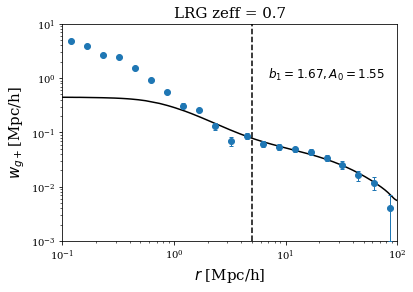

In [4]:

plt.rc('font',family='serif')


fig = plt.figure(figsize=(6,4))
gs = gridspec.GridSpec(1, 1)
gs.update(hspace=0 ,wspace=0.2)
ax = fig.add_subplot(gs[0])
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim(1e-1,100)
ax.set_ylim(1e-3,10)
plt.errorbar(meanr,xi,fmt="o",yerr=err,capthick=1,elinewidth=1,capsize=2,zorder=10)
plt.plot(rp,wgp,color="black")
ax.axvline(x=5,linestyle="--",color="black")
ax.text(7,1,r'$b_1=1.67,A_0=1.55$',fontsize=12)


ax.set_xlabel(r'$r $ [Mpc/h]',fontsize=15)
ax.set_ylabel(r'$\it{w}_{g+}$[Mpc/h]',fontsize=15)
ax.set_title('LRG zeff = 0.7',fontsize=15)
#plt.tight_layout()
